<a href="https://colab.research.google.com/github/Derevenitckaia/ML_itmo_course/blob/main/task_2_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


# Задание 1
Уменьшите размерность при помощи библиотеки sklearn. 


> Данные описывают 60 объектов, каждый из которых обладает 10 признаками.



 Считываем данные


In [ ]:
df = pd.read_csv('/content/data/41_25.csv', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9
0,-7.740340,9.277438,-4.854174,-1.202028,-12.348254,-10.066532,14.795244,19.147509,-16.013266,-9.549785
1,-11.313491,-21.953282,8.975190,-23.328462,-15.637988,6.108675,-13.792329,9.819516,19.525042,-3.615621
2,5.473343,12.630822,-5.005415,-4.796412,-15.365238,-3.247915,-6.766479,4.724994,-20.113874,10.556540
3,3.979157,12.917397,-3.554173,-5.197877,-13.169246,-2.132375,-7.997947,5.541322,-18.522509,11.654845
4,-13.582469,-20.957017,9.967119,-24.720595,-20.364866,4.937101,-17.882545,9.390128,19.921203,-4.903220


In [ ]:
# Выделим две главные компоненты
pca = PCA(n_components=2, svd_solver='full')
df_centered = df - df.mean(axis=0)
pca.fit(df_centered)
df.pca = pca.transform(df_centered)

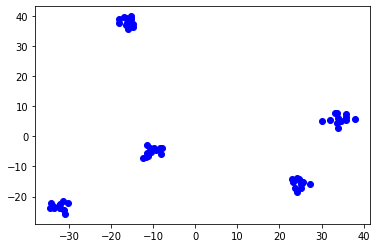

In [ ]:
plt.plot(df_pca[:, 0], df_pca[:, 1], 'bo')

Доля объясненной дисперсии при использовании первых двух главных компонент

In [ ]:
np.cumsum(pca.explained_variance_ratio_)[1]

0.7902653946044564

Посмотрим вклад каждой компоненты в дисперсию данных

In [ ]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))


1 component: 45.91% of initial variance
2 component: 33.11% of initial variance


Зададим пороговое значение дисперсии для выбора количества компонент

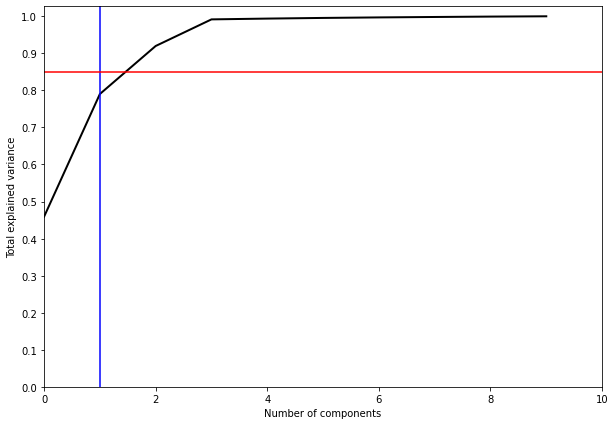

In [ ]:
pca = PCA().fit(df)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 10)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(1, c='b')
plt.axhline(0.85, c='r')
plt.show();

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.45911753, 0.79026539, 0.91987311, 0.99169062, 0.99381604,
       0.99560982, 0.99700989, 0.99816827, 0.99921582, 1.        ])

# Задание 2

Для прохода на новогодний корпоратив в ИТМО при входе нужно отгадать «логотип мероприятия». Для получения изображения логотипа необходимо по первым десяти главным компонентам восстановить исходное изображение (в качестве пригласительных рассылались матрица счётов и матрица весов первых десяти ГК).

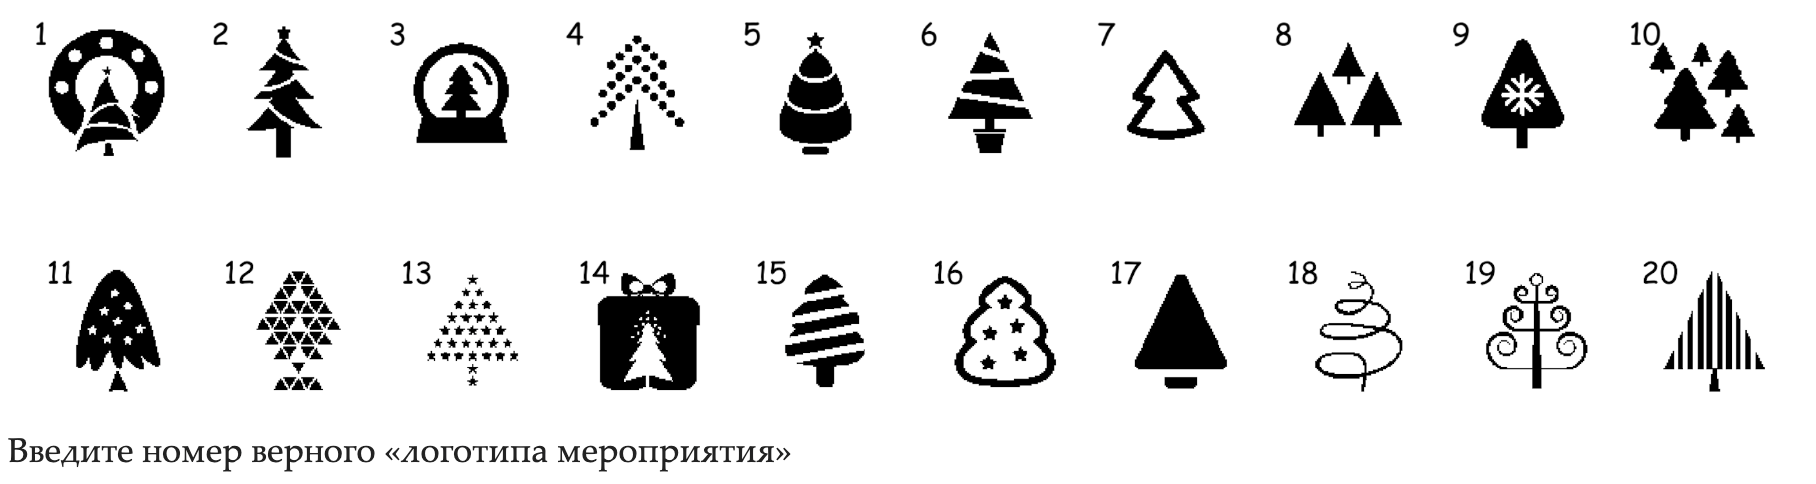

In [ ]:
var = pd.read_csv('/content/data/X_reduced_492.csv', header=None, sep = ';')
weight = pd.read_csv('/content/data/X_loadings_492.csv', header=None, sep = ';')

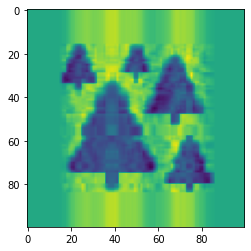

In [ ]:
z = var.to_numpy()
fi = weight.to_numpy()
fi_t = np.transpose(fi)
fi_t.shape, z.shape
F = np.dot(z, fi_t)

import matplotlib.pyplot as plt
plt.imshow(F)